<a href="https://colab.research.google.com/github/hecangbei/hecangbei/blob/main/Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIF model of neuron with constant current**

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Define the total time of simulation an also the time resolution:
T = 100 # the total time for a single simulation
dt = 0.1 # the time resolution.
time = np.arange(0, T+dt, dt)
t_rest = 0 # the initial refractory period time a neuron needs to being available again.

In [15]:
# Specify neuron properties
V_m = np.zeros(len(time)) # An array for recording membrane voltage.
R_m = 1 # Resistance of the neuron.
C_m = 10 # Capacitance of the neuron
tau_m = R_m * C_m # time constant of the neuron
tau_ref = 4 # the refractory period of the neuron
V_th = 1 # Spike threshold
V_spike = 10.0 # Neuron spike maximum amplitude.
I = 2.0 * np.ones(len(time)) # Input current (Bias term i neural network).
noise = []


In [16]:
# itteration:
for i, t in enumerate(time):
  if (t > t_rest):
    randomTerm = np.random.normal(0, 1)
    noise.append(randomTerm)
    V_m[i] = V_m[i-1] + (-V_m[i-1] + I[i] * R_m + randomTerm) / tau_m * dt
    if (V_m[i] >= V_th):
      V_m[i] += V_spike
      t_rest = t + tau_ref
                              


**Visualize the action potential**

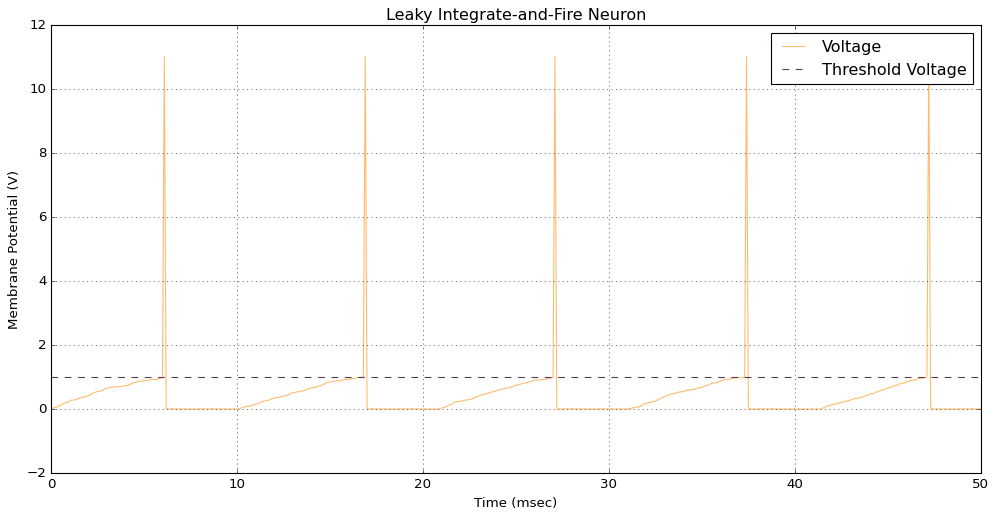

In [21]:
sns.set_style('dark')
plt.figure(figsize=(15, 7))
plt.style.use('classic')
plt.plot(time, V_m, color = u'#FFBB6C', label='Voltage')
#plt.plot(I, color= u'#D4896A', linestyle='-', label='I')
plt.plot([0,50], [V_th, V_th], color='#503C53', linestyle='--', label='Threshold Voltage')
plt.legend(loc=1)
plt.grid()
plt.title('Leaky Integrate-and-Fire Neuron')
plt.ylabel('Membrane Potential (V)')
plt.xlabel('Time (msec)')
plt.xlim(0,50)
plt.ylim(-2,12)
plt.savefig('LIF.png', dpi=300)